In [1]:
import torch 
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import random

from src.NN.custom_emlp_multistep import *
from src.NN.aug_multistep import *
from src.NN.multi_step_pred import * 


/mnt/d_disk/ch20b065/.conda/envs/liegan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/d_disk/ch20b065/.conda/envs/liegan/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
from Data.pendulum_dataset import * 
from torch.utils.data import Subset, DataLoader

# data_dict = generate_pendulum_dataset(
#     save_path='./data/pendulum_dataset.pkl',
#     num_trajectories=2000,
#     t_span=(0, 10),
#     num_steps=100,
#     test_split=0.1,
#     mass = 1.0,
#     g=9.8,
#     length=1.0,
#     damping=0.0,
#     random_seed=42
# )

input_timesteps = 5
output_timesteps = 2
n_dim = 2

train_dataset = PendulumDataset(
    save_path='./data/pendulum_dataset.pkl',
    input_timesteps = input_timesteps,
    output_timesteps = output_timesteps,
    mode='train'
)

test_dataset = PendulumDataset(
    save_path='./data/pendulum_dataset.pkl',
    input_timesteps = input_timesteps,
    output_timesteps = output_timesteps,
    mode='test'
)


# Get the actual size of the dataset
train_size = 2000
test_size = 400

# Sample accordingly
train_indices = np.random.choice(len(train_dataset), size=train_size, replace=False)
test_indices = np.random.choice(len(test_dataset), size=test_size, replace=False)

train_dataset = Subset(train_dataset,train_indices)
test_dataset = Subset(test_dataset,test_indices)

In [3]:

print('\nTraining Multi Step Prediction Model...')

batch_size = 64 
epochs = 500 
lr = 1e-3 

model, stats = train_PredModel(train_dataset,test_dataset,batch_size,epochs,lr,n_dim,input_timesteps,output_timesteps)


Training Multi Step Prediction Model...
Starting training: 500 epochs


  1%|          | 3/500 [00:00<01:08,  7.28it/s]

Epoch 1/500, Train Loss: 1.294390, Test Loss: 0.116673


  3%|▎         | 13/500 [00:01<00:44, 10.87it/s]

Epoch 11/500, Train Loss: 0.258698, Test Loss: 0.025750


  5%|▍         | 23/500 [00:02<00:43, 11.08it/s]

Epoch 21/500, Train Loss: 0.224898, Test Loss: 0.019333


  7%|▋         | 33/500 [00:03<00:42, 10.86it/s]

Epoch 31/500, Train Loss: 0.226713, Test Loss: 0.023049


  9%|▊         | 43/500 [00:04<00:41, 11.06it/s]

Epoch 41/500, Train Loss: 0.202489, Test Loss: 0.017277


 11%|█         | 53/500 [00:04<00:40, 11.17it/s]

Epoch 51/500, Train Loss: 0.206053, Test Loss: 0.018208


 13%|█▎        | 63/500 [00:05<00:39, 10.98it/s]

Epoch 61/500, Train Loss: 0.199468, Test Loss: 0.016201


 15%|█▍        | 73/500 [00:06<00:38, 11.21it/s]

Epoch 71/500, Train Loss: 0.189807, Test Loss: 0.022868


 17%|█▋        | 83/500 [00:07<00:37, 11.24it/s]

Epoch 81/500, Train Loss: 0.192248, Test Loss: 0.015794


 19%|█▊        | 93/500 [00:08<00:35, 11.35it/s]

Epoch 91/500, Train Loss: 0.188466, Test Loss: 0.023511


 21%|██        | 103/500 [00:09<00:36, 10.92it/s]

Epoch 101/500, Train Loss: 0.188055, Test Loss: 0.016164


 23%|██▎       | 113/500 [00:10<00:34, 11.11it/s]

Epoch 111/500, Train Loss: 0.181439, Test Loss: 0.018327


 25%|██▍       | 123/500 [00:11<00:34, 10.87it/s]

Epoch 121/500, Train Loss: 0.182812, Test Loss: 0.024447


 27%|██▋       | 133/500 [00:12<00:33, 11.02it/s]

Epoch 131/500, Train Loss: 0.178895, Test Loss: 0.016592


 29%|██▊       | 143/500 [00:13<00:32, 11.13it/s]

Epoch 141/500, Train Loss: 0.176618, Test Loss: 0.018312


 31%|███       | 153/500 [00:13<00:31, 10.93it/s]

Epoch 151/500, Train Loss: 0.168000, Test Loss: 0.019019


 33%|███▎      | 163/500 [00:14<00:29, 11.28it/s]

Epoch 161/500, Train Loss: 0.175896, Test Loss: 0.019986


 35%|███▍      | 173/500 [00:15<00:29, 11.22it/s]

Epoch 171/500, Train Loss: 0.173154, Test Loss: 0.018457


 37%|███▋      | 183/500 [00:16<00:28, 11.15it/s]

Epoch 181/500, Train Loss: 0.174967, Test Loss: 0.023421


 39%|███▊      | 193/500 [00:17<00:27, 11.05it/s]

Epoch 191/500, Train Loss: 0.165414, Test Loss: 0.016676


 41%|████      | 203/500 [00:18<00:26, 11.20it/s]

Epoch 201/500, Train Loss: 0.157955, Test Loss: 0.022526


 43%|████▎     | 213/500 [00:19<00:25, 11.25it/s]

Epoch 211/500, Train Loss: 0.172257, Test Loss: 0.020913


 45%|████▍     | 223/500 [00:20<00:25, 10.96it/s]

Epoch 221/500, Train Loss: 0.168148, Test Loss: 0.023118


 47%|████▋     | 233/500 [00:21<00:23, 11.30it/s]

Epoch 231/500, Train Loss: 0.162455, Test Loss: 0.013420


 49%|████▊     | 243/500 [00:22<00:23, 10.94it/s]

Epoch 241/500, Train Loss: 0.163456, Test Loss: 0.023165


 50%|█████     | 252/500 [00:23<00:30,  8.02it/s]

Epoch 251/500, Train Loss: 0.163935, Test Loss: 0.017289


 52%|█████▏    | 262/500 [00:24<00:24,  9.69it/s]

Epoch 261/500, Train Loss: 0.156314, Test Loss: 0.021596


 54%|█████▍    | 272/500 [00:25<00:20, 11.08it/s]

Epoch 271/500, Train Loss: 0.160156, Test Loss: 0.024728


 56%|█████▋    | 282/500 [00:26<00:19, 11.30it/s]

Epoch 281/500, Train Loss: 0.154768, Test Loss: 0.025100


 58%|█████▊    | 292/500 [00:26<00:17, 11.62it/s]

Epoch 291/500, Train Loss: 0.154397, Test Loss: 0.024898


 60%|██████    | 302/500 [00:27<00:17, 11.27it/s]

Epoch 301/500, Train Loss: 0.149715, Test Loss: 0.018787


 62%|██████▏   | 312/500 [00:28<00:16, 11.40it/s]

Epoch 311/500, Train Loss: 0.155776, Test Loss: 0.020644


 64%|██████▍   | 322/500 [00:29<00:15, 11.35it/s]

Epoch 321/500, Train Loss: 0.152936, Test Loss: 0.028464


 66%|██████▋   | 332/500 [00:30<00:14, 11.34it/s]

Epoch 331/500, Train Loss: 0.146312, Test Loss: 0.024741


 68%|██████▊   | 342/500 [00:31<00:13, 11.30it/s]

Epoch 341/500, Train Loss: 0.148109, Test Loss: 0.023526


 70%|███████   | 352/500 [00:32<00:13, 10.94it/s]

Epoch 351/500, Train Loss: 0.147680, Test Loss: 0.035349


 72%|███████▏  | 362/500 [00:33<00:12, 11.23it/s]

Epoch 361/500, Train Loss: 0.153472, Test Loss: 0.027535


 74%|███████▍  | 372/500 [00:34<00:11, 11.11it/s]

Epoch 371/500, Train Loss: 0.147063, Test Loss: 0.024036


 76%|███████▋  | 382/500 [00:34<00:10, 11.09it/s]

Epoch 381/500, Train Loss: 0.142262, Test Loss: 0.042707


 78%|███████▊  | 392/500 [00:35<00:09, 11.03it/s]

Epoch 391/500, Train Loss: 0.137618, Test Loss: 0.026611


 80%|████████  | 402/500 [00:36<00:08, 11.26it/s]

Epoch 401/500, Train Loss: 0.131288, Test Loss: 0.030683


 82%|████████▏ | 412/500 [00:37<00:07, 11.22it/s]

Epoch 411/500, Train Loss: 0.137741, Test Loss: 0.024650


 84%|████████▍ | 422/500 [00:38<00:06, 11.16it/s]

Epoch 421/500, Train Loss: 0.128888, Test Loss: 0.029562


 86%|████████▋ | 432/500 [00:39<00:06, 11.07it/s]

Epoch 431/500, Train Loss: 0.129773, Test Loss: 0.036549


 88%|████████▊ | 442/500 [00:40<00:05, 11.10it/s]

Epoch 441/500, Train Loss: 0.129508, Test Loss: 0.030813


 90%|█████████ | 452/500 [00:41<00:04, 11.03it/s]

Epoch 451/500, Train Loss: 0.137400, Test Loss: 0.029855


 92%|█████████▏| 462/500 [00:42<00:03, 10.85it/s]

Epoch 461/500, Train Loss: 0.133176, Test Loss: 0.020849


 94%|█████████▍| 472/500 [00:43<00:02, 11.31it/s]

Epoch 471/500, Train Loss: 0.129486, Test Loss: 0.035649


 96%|█████████▋| 482/500 [00:43<00:01, 11.20it/s]

Epoch 481/500, Train Loss: 0.128559, Test Loss: 0.023970


 98%|█████████▊| 492/500 [00:44<00:00, 11.17it/s]

Epoch 491/500, Train Loss: 0.121536, Test Loss: 0.036762


100%|██████████| 500/500 [00:45<00:00, 10.97it/s]

Epoch 500/500, Train Loss: 0.125440, Test Loss: 0.032171


In [4]:
n_channel = 1

lie_algebra = get_generators(n_dim,n_channel,'saved_model/LieGAN/pendulum/pendulum_generator_99.pt','pendulum')
G = CustomGroup(n_dim,lie_algebra) 

In [5]:
print('\n Training EMLP Multi Step Prediction Model...') 



model_emlp, stats_emlp = train_predModel_emlp(
    G, train_dataset, test_dataset,
    batch_size, epochs, lr, 
    n_dim, input_timesteps, output_timesteps
)


 Training EMLP Multi Step Prediction Model...
Starting training: 500 epochs


  1%|          | 3/500 [00:19<41:44,  5.04s/it]  

Epoch 1/500, Train Loss: 4.596681, Test Loss: 4.427889


  3%|▎         | 13/500 [00:20<03:38,  2.23it/s]

Epoch 11/500, Train Loss: 0.274790, Test Loss: 0.239761


  5%|▍         | 23/500 [00:20<01:01,  7.73it/s]

Epoch 21/500, Train Loss: 0.096898, Test Loss: 0.104551


  7%|▋         | 33/500 [00:21<00:38, 12.29it/s]

Epoch 31/500, Train Loss: 0.080019, Test Loss: 0.083570


  9%|▊         | 43/500 [00:22<00:33, 13.75it/s]

Epoch 41/500, Train Loss: 0.062929, Test Loss: 0.062739


 11%|█         | 53/500 [00:22<00:32, 13.95it/s]

Epoch 51/500, Train Loss: 0.046493, Test Loss: 0.045877


 13%|█▎        | 63/500 [00:23<00:31, 13.97it/s]

Epoch 61/500, Train Loss: 0.030742, Test Loss: 0.029633


 15%|█▍        | 73/500 [00:24<00:30, 13.97it/s]

Epoch 71/500, Train Loss: 0.028770, Test Loss: 0.027393


 17%|█▋        | 83/500 [00:25<00:29, 13.96it/s]

Epoch 81/500, Train Loss: 0.027855, Test Loss: 0.026179


 19%|█▊        | 93/500 [00:25<00:29, 14.02it/s]

Epoch 91/500, Train Loss: 0.026921, Test Loss: 0.025049


 21%|██        | 103/500 [00:26<00:28, 14.00it/s]

Epoch 101/500, Train Loss: 0.025941, Test Loss: 0.023874


 23%|██▎       | 113/500 [00:27<00:27, 13.88it/s]

Epoch 111/500, Train Loss: 0.024813, Test Loss: 0.022535


 25%|██▍       | 123/500 [00:27<00:27, 13.88it/s]

Epoch 121/500, Train Loss: 0.023636, Test Loss: 0.021216


 27%|██▋       | 133/500 [00:28<00:26, 13.96it/s]

Epoch 131/500, Train Loss: 0.022716, Test Loss: 0.020246


 29%|██▊       | 143/500 [00:29<00:25, 13.96it/s]

Epoch 141/500, Train Loss: 0.021902, Test Loss: 0.019482


 31%|███       | 153/500 [00:30<00:24, 14.01it/s]

Epoch 151/500, Train Loss: 0.021096, Test Loss: 0.018703


 33%|███▎      | 163/500 [00:30<00:24, 13.91it/s]

Epoch 161/500, Train Loss: 0.020406, Test Loss: 0.017923


 35%|███▍      | 173/500 [00:31<00:23, 13.98it/s]

Epoch 171/500, Train Loss: 0.019619, Test Loss: 0.017252


 37%|███▋      | 183/500 [00:32<00:22, 13.95it/s]

Epoch 181/500, Train Loss: 0.018739, Test Loss: 0.016393


 39%|███▊      | 193/500 [00:33<00:26, 11.69it/s]

Epoch 191/500, Train Loss: 0.017836, Test Loss: 0.016189


 41%|████      | 203/500 [00:33<00:23, 12.43it/s]

Epoch 201/500, Train Loss: 0.017030, Test Loss: 0.015969


 43%|████▎     | 213/500 [00:34<00:20, 13.76it/s]

Epoch 211/500, Train Loss: 0.016183, Test Loss: 0.016353


 45%|████▍     | 223/500 [00:35<00:19, 13.91it/s]

Epoch 221/500, Train Loss: 0.015314, Test Loss: 0.017338


 47%|████▋     | 233/500 [00:36<00:19, 14.00it/s]

Epoch 231/500, Train Loss: 0.014470, Test Loss: 0.017050


 49%|████▊     | 243/500 [00:36<00:18, 13.85it/s]

Epoch 241/500, Train Loss: 0.013647, Test Loss: 0.016236


 51%|█████     | 253/500 [00:37<00:17, 14.02it/s]

Epoch 251/500, Train Loss: 0.012837, Test Loss: 0.015937


 53%|█████▎    | 263/500 [00:38<00:16, 14.03it/s]

Epoch 261/500, Train Loss: 0.011769, Test Loss: 0.014452


 55%|█████▍    | 273/500 [00:38<00:16, 13.97it/s]

Epoch 271/500, Train Loss: 0.011663, Test Loss: 0.013401


 57%|█████▋    | 283/500 [00:39<00:15, 13.99it/s]

Epoch 281/500, Train Loss: 0.011649, Test Loss: 0.013467


 59%|█████▊    | 293/500 [00:40<00:14, 14.02it/s]

Epoch 291/500, Train Loss: 0.011488, Test Loss: 0.014122


 61%|██████    | 303/500 [00:41<00:14, 13.92it/s]

Epoch 301/500, Train Loss: 0.011219, Test Loss: 0.012712


 63%|██████▎   | 313/500 [00:41<00:13, 13.97it/s]

Epoch 311/500, Train Loss: 0.010449, Test Loss: 0.013722


 65%|██████▍   | 323/500 [00:42<00:12, 13.91it/s]

Epoch 321/500, Train Loss: 0.010680, Test Loss: 0.013679


 67%|██████▋   | 333/500 [00:43<00:11, 14.01it/s]

Epoch 331/500, Train Loss: 0.010114, Test Loss: 0.012623


 69%|██████▊   | 343/500 [00:43<00:11, 13.95it/s]

Epoch 341/500, Train Loss: 0.010606, Test Loss: 0.012301


 71%|███████   | 353/500 [00:44<00:10, 13.97it/s]

Epoch 351/500, Train Loss: 0.010308, Test Loss: 0.012100


 73%|███████▎  | 363/500 [00:45<00:09, 13.97it/s]

Epoch 361/500, Train Loss: 0.009981, Test Loss: 0.012488


 75%|███████▍  | 373/500 [00:46<00:09, 14.01it/s]

Epoch 371/500, Train Loss: 0.010455, Test Loss: 0.013247


 77%|███████▋  | 383/500 [00:46<00:08, 14.00it/s]

Epoch 381/500, Train Loss: 0.009839, Test Loss: 0.012022


 79%|███████▊  | 393/500 [00:47<00:07, 14.03it/s]

Epoch 391/500, Train Loss: 0.009956, Test Loss: 0.012952


 81%|████████  | 403/500 [00:48<00:06, 14.01it/s]

Epoch 401/500, Train Loss: 0.009985, Test Loss: 0.013472


 83%|████████▎ | 413/500 [00:48<00:06, 13.97it/s]

Epoch 411/500, Train Loss: 0.009844, Test Loss: 0.012115


 85%|████████▍ | 423/500 [00:49<00:05, 13.93it/s]

Epoch 421/500, Train Loss: 0.009884, Test Loss: 0.011630


 87%|████████▋ | 433/500 [00:50<00:04, 13.90it/s]

Epoch 431/500, Train Loss: 0.010087, Test Loss: 0.012835


 89%|████████▊ | 443/500 [00:51<00:04, 13.98it/s]

Epoch 441/500, Train Loss: 0.009632, Test Loss: 0.011627


 91%|█████████ | 453/500 [00:51<00:03, 13.99it/s]

Epoch 451/500, Train Loss: 0.009677, Test Loss: 0.013537


 93%|█████████▎| 463/500 [00:52<00:02, 14.00it/s]

Epoch 461/500, Train Loss: 0.009860, Test Loss: 0.013144


 95%|█████████▍| 473/500 [00:53<00:01, 13.95it/s]

Epoch 471/500, Train Loss: 0.010015, Test Loss: 0.014521


 97%|█████████▋| 483/500 [00:54<00:01, 14.01it/s]

Epoch 481/500, Train Loss: 0.009738, Test Loss: 0.012842


 99%|█████████▊| 493/500 [00:54<00:00, 13.98it/s]

Epoch 491/500, Train Loss: 0.009620, Test Loss: 0.012831


100%|██████████| 500/500 [00:55<00:00,  9.05it/s]

Epoch 500/500, Train Loss: 0.010044, Test Loss: 0.013548


In [6]:
print('\n Training Augmented Mutli step Prediction Model...') 

generator = get_generator(n_dim,'saved_model/LieGAN/pendulum/args_pendulum.pkl')
batch_size = 64 
epochs = 500 
lr = 1e-3 


model_aug, stats_aug = train_augPred(
    generator, train_dataset, test_dataset, 
    batch_size,epochs,lr, n_dim, input_timesteps,output_timesteps,n_copy=10
)



 Training Augmented Mutli step Prediction Model...
Starting training: 500 epochs


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<03:51,  2.16it/s]

Epoch 1/500, Train Loss: 3.316302, Test Loss: 1.375128


  2%|▏         | 11/500 [00:03<02:30,  3.26it/s]

Epoch 11/500, Train Loss: 0.385553, Test Loss: 0.052910


  4%|▍         | 21/500 [00:06<02:25,  3.30it/s]

Epoch 21/500, Train Loss: 0.269290, Test Loss: 0.021668


  6%|▌         | 31/500 [00:09<02:22,  3.28it/s]

Epoch 31/500, Train Loss: 0.253479, Test Loss: 0.029189


  8%|▊         | 41/500 [00:12<02:35,  2.95it/s]

Epoch 41/500, Train Loss: 0.224126, Test Loss: 0.024093


 10%|█         | 51/500 [00:15<02:17,  3.26it/s]

Epoch 51/500, Train Loss: 0.231098, Test Loss: 0.028185


 12%|█▏        | 61/500 [00:18<02:12,  3.30it/s]

Epoch 61/500, Train Loss: 0.211053, Test Loss: 0.017524


 14%|█▍        | 71/500 [00:21<02:09,  3.30it/s]

Epoch 71/500, Train Loss: 0.202546, Test Loss: 0.026444


 16%|█▌        | 81/500 [00:24<02:07,  3.29it/s]

Epoch 81/500, Train Loss: 0.202087, Test Loss: 0.022200


 18%|█▊        | 91/500 [00:27<02:03,  3.32it/s]

Epoch 91/500, Train Loss: 0.197152, Test Loss: 0.014367


 20%|██        | 101/500 [00:30<02:01,  3.29it/s]

Epoch 101/500, Train Loss: 0.195685, Test Loss: 0.020391


 22%|██▏       | 111/500 [00:34<01:56,  3.33it/s]

Epoch 111/500, Train Loss: 0.181986, Test Loss: 0.020800


 24%|██▍       | 121/500 [00:37<01:54,  3.30it/s]

Epoch 121/500, Train Loss: 0.186673, Test Loss: 0.019863


 26%|██▌       | 131/500 [00:40<01:51,  3.31it/s]

Epoch 131/500, Train Loss: 0.174635, Test Loss: 0.022725


 28%|██▊       | 141/500 [00:43<01:48,  3.30it/s]

Epoch 141/500, Train Loss: 0.179823, Test Loss: 0.016214


 30%|███       | 151/500 [00:46<01:47,  3.24it/s]

Epoch 151/500, Train Loss: 0.188988, Test Loss: 0.019411


 32%|███▏      | 161/500 [00:49<01:42,  3.31it/s]

Epoch 161/500, Train Loss: 0.173817, Test Loss: 0.018033


 34%|███▍      | 171/500 [00:52<01:39,  3.30it/s]

Epoch 171/500, Train Loss: 0.168001, Test Loss: 0.025166


 36%|███▌      | 181/500 [00:55<01:37,  3.27it/s]

Epoch 181/500, Train Loss: 0.167371, Test Loss: 0.027765


 38%|███▊      | 191/500 [00:58<01:33,  3.30it/s]

Epoch 191/500, Train Loss: 0.175023, Test Loss: 0.029832


 40%|████      | 201/500 [01:01<01:31,  3.27it/s]

Epoch 201/500, Train Loss: 0.169191, Test Loss: 0.024250


 42%|████▏     | 211/500 [01:04<01:27,  3.32it/s]

Epoch 211/500, Train Loss: 0.174649, Test Loss: 0.017720


 44%|████▍     | 221/500 [01:07<01:25,  3.25it/s]

Epoch 221/500, Train Loss: 0.166378, Test Loss: 0.028823


 46%|████▌     | 231/500 [01:10<01:21,  3.31it/s]

Epoch 231/500, Train Loss: 0.165973, Test Loss: 0.029442


 48%|████▊     | 241/500 [01:13<01:18,  3.29it/s]

Epoch 241/500, Train Loss: 0.162890, Test Loss: 0.024504


 50%|█████     | 251/500 [01:16<01:15,  3.30it/s]

Epoch 251/500, Train Loss: 0.166528, Test Loss: 0.019182


 52%|█████▏    | 261/500 [01:19<01:13,  3.24it/s]

Epoch 261/500, Train Loss: 0.157033, Test Loss: 0.018751


 54%|█████▍    | 271/500 [01:22<01:09,  3.31it/s]

Epoch 271/500, Train Loss: 0.159367, Test Loss: 0.023408


 56%|█████▌    | 281/500 [01:25<01:06,  3.28it/s]

Epoch 281/500, Train Loss: 0.156689, Test Loss: 0.036282


 58%|█████▊    | 291/500 [01:28<01:03,  3.31it/s]

Epoch 291/500, Train Loss: 0.147123, Test Loss: 0.030228


 60%|██████    | 301/500 [01:31<01:00,  3.29it/s]

Epoch 301/500, Train Loss: 0.161553, Test Loss: 0.030051


 62%|██████▏   | 311/500 [01:34<00:57,  3.31it/s]

Epoch 311/500, Train Loss: 0.163176, Test Loss: 0.022065


 64%|██████▍   | 321/500 [01:37<00:53,  3.34it/s]

Epoch 321/500, Train Loss: 0.150684, Test Loss: 0.019053


 66%|██████▌   | 331/500 [01:40<00:52,  3.25it/s]

Epoch 331/500, Train Loss: 0.140474, Test Loss: 0.018175


 68%|██████▊   | 341/500 [01:43<00:48,  3.30it/s]

Epoch 341/500, Train Loss: 0.147818, Test Loss: 0.023394


 70%|███████   | 351/500 [01:46<00:45,  3.28it/s]

Epoch 351/500, Train Loss: 0.151071, Test Loss: 0.021426


 72%|███████▏  | 361/500 [01:50<00:42,  3.29it/s]

Epoch 361/500, Train Loss: 0.148856, Test Loss: 0.020065


 74%|███████▍  | 371/500 [01:53<00:39,  3.29it/s]

Epoch 371/500, Train Loss: 0.149958, Test Loss: 0.027172


 76%|███████▌  | 381/500 [01:56<00:35,  3.31it/s]

Epoch 381/500, Train Loss: 0.138371, Test Loss: 0.015914


 78%|███████▊  | 391/500 [01:59<00:33,  3.26it/s]

Epoch 391/500, Train Loss: 0.142458, Test Loss: 0.029720


 80%|████████  | 401/500 [02:02<00:29,  3.35it/s]

Epoch 401/500, Train Loss: 0.143442, Test Loss: 0.026033


 82%|████████▏ | 411/500 [02:05<00:26,  3.32it/s]

Epoch 411/500, Train Loss: 0.136618, Test Loss: 0.017369


 84%|████████▍ | 421/500 [02:08<00:23,  3.33it/s]

Epoch 421/500, Train Loss: 0.150798, Test Loss: 0.018820


 86%|████████▌ | 431/500 [02:11<00:20,  3.34it/s]

Epoch 431/500, Train Loss: 0.141457, Test Loss: 0.038107


 88%|████████▊ | 441/500 [02:14<00:17,  3.30it/s]

Epoch 441/500, Train Loss: 0.133561, Test Loss: 0.031628


 90%|█████████ | 451/500 [02:17<00:14,  3.32it/s]

Epoch 451/500, Train Loss: 0.138638, Test Loss: 0.025319


 92%|█████████▏| 461/500 [02:20<00:11,  3.30it/s]

Epoch 461/500, Train Loss: 0.142141, Test Loss: 0.037541


 94%|█████████▍| 471/500 [02:23<00:09,  3.05it/s]

Epoch 471/500, Train Loss: 0.126381, Test Loss: 0.029542


 96%|█████████▌| 481/500 [02:26<00:05,  3.30it/s]

Epoch 481/500, Train Loss: 0.126017, Test Loss: 0.029316


 98%|█████████▊| 491/500 [02:29<00:02,  3.28it/s]

Epoch 491/500, Train Loss: 0.132910, Test Loss: 0.043249


100%|██████████| 500/500 [02:32<00:00,  3.28it/s]

Epoch 500/500, Train Loss: 0.142640, Test Loss: 0.021997


In [7]:
print('\n Training Vanilla  Augmented Mutli step Prediction Model...') 

batch_size = 64 
epochs = 500 
lr = 1e-3 

generator = get_generator(n_dim,'saved_model/LieGAN/pendulum/args_pendulum.pkl')



model_aug_van, stats_aug_van = train_augPred_vanilla(
    generator, train_dataset, test_dataset, 
    batch_size,epochs,lr, n_dim, input_timesteps,output_timesteps
)


 Training Vanilla  Augmented Mutli step Prediction Model...
Starting training: 500 epochs


  0%|          | 1/500 [00:00<03:08,  2.65it/s]

Epoch 1/500, Train Loss: 17.613474, Test Loss: 9.022826


  2%|▏         | 11/500 [00:04<03:06,  2.62it/s]

Epoch 11/500, Train Loss: 7.154695, Test Loss: 5.233744


  4%|▍         | 21/500 [00:07<02:59,  2.67it/s]

Epoch 21/500, Train Loss: 6.661280, Test Loss: 6.607560


  6%|▌         | 31/500 [00:11<02:55,  2.67it/s]

Epoch 31/500, Train Loss: 6.057386, Test Loss: 6.732561


  8%|▊         | 41/500 [00:15<02:52,  2.66it/s]

Epoch 41/500, Train Loss: 5.700158, Test Loss: 7.772845


 10%|█         | 51/500 [00:19<02:49,  2.65it/s]

Epoch 51/500, Train Loss: 5.086711, Test Loss: 8.334254


 12%|█▏        | 61/500 [00:22<02:46,  2.64it/s]

Epoch 61/500, Train Loss: 4.753469, Test Loss: 8.792967


 14%|█▍        | 71/500 [00:26<02:41,  2.65it/s]

Epoch 71/500, Train Loss: 4.147922, Test Loss: 9.821813


 16%|█▌        | 81/500 [00:30<02:40,  2.61it/s]

Epoch 81/500, Train Loss: 3.667317, Test Loss: 8.654580


 18%|█▊        | 91/500 [00:34<02:34,  2.65it/s]

Epoch 91/500, Train Loss: 3.381187, Test Loss: 10.007650


 20%|██        | 101/500 [00:38<02:31,  2.64it/s]

Epoch 101/500, Train Loss: 2.910704, Test Loss: 10.510379


 22%|██▏       | 111/500 [00:41<02:27,  2.63it/s]

Epoch 111/500, Train Loss: 2.758196, Test Loss: 11.877050


 24%|██▍       | 121/500 [00:45<02:23,  2.65it/s]

Epoch 121/500, Train Loss: 2.611599, Test Loss: 11.724761


 26%|██▌       | 131/500 [00:49<02:18,  2.66it/s]

Epoch 131/500, Train Loss: 2.376953, Test Loss: 11.643681


 28%|██▊       | 141/500 [00:53<02:15,  2.66it/s]

Epoch 141/500, Train Loss: 2.039160, Test Loss: 11.357225


 30%|███       | 151/500 [00:57<02:17,  2.54it/s]

Epoch 151/500, Train Loss: 2.115666, Test Loss: 10.764832


 32%|███▏      | 161/500 [01:00<02:08,  2.64it/s]

Epoch 161/500, Train Loss: 1.924468, Test Loss: 11.879838


 34%|███▍      | 171/500 [01:04<02:04,  2.65it/s]

Epoch 171/500, Train Loss: 1.857565, Test Loss: 12.131322


 36%|███▌      | 181/500 [01:08<02:01,  2.64it/s]

Epoch 181/500, Train Loss: 1.815798, Test Loss: 12.881894


 38%|███▊      | 191/500 [01:12<01:57,  2.63it/s]

Epoch 191/500, Train Loss: 1.641991, Test Loss: 12.608888


 40%|████      | 201/500 [01:16<01:53,  2.64it/s]

Epoch 201/500, Train Loss: 1.708645, Test Loss: 13.493339


 42%|████▏     | 211/500 [01:19<01:49,  2.64it/s]

Epoch 211/500, Train Loss: 1.635745, Test Loss: 12.996632


 44%|████▍     | 221/500 [01:23<01:45,  2.65it/s]

Epoch 221/500, Train Loss: 1.683651, Test Loss: 13.445669


 46%|████▌     | 231/500 [01:27<01:41,  2.65it/s]

Epoch 231/500, Train Loss: 1.495983, Test Loss: 14.069648


 48%|████▊     | 241/500 [01:31<01:39,  2.59it/s]

Epoch 241/500, Train Loss: 1.521027, Test Loss: 13.057964


 50%|█████     | 251/500 [01:35<01:33,  2.66it/s]

Epoch 251/500, Train Loss: 1.501625, Test Loss: 14.164962


 52%|█████▏    | 261/500 [01:38<01:30,  2.63it/s]

Epoch 261/500, Train Loss: 1.407250, Test Loss: 13.246381


 54%|█████▍    | 271/500 [01:42<01:26,  2.64it/s]

Epoch 271/500, Train Loss: 1.408492, Test Loss: 13.394329


 56%|█████▌    | 281/500 [01:46<01:22,  2.64it/s]

Epoch 281/500, Train Loss: 1.465316, Test Loss: 13.444310


 58%|█████▊    | 291/500 [01:50<01:19,  2.62it/s]

Epoch 291/500, Train Loss: 1.420745, Test Loss: 14.113522


 60%|██████    | 301/500 [01:54<01:15,  2.64it/s]

Epoch 301/500, Train Loss: 1.405385, Test Loss: 14.345937


 62%|██████▏   | 311/500 [01:57<01:12,  2.61it/s]

Epoch 311/500, Train Loss: 1.348150, Test Loss: 13.897405


 64%|██████▍   | 321/500 [02:01<01:10,  2.54it/s]

Epoch 321/500, Train Loss: 1.353334, Test Loss: 14.285117


 66%|██████▌   | 331/500 [02:05<01:03,  2.65it/s]

Epoch 331/500, Train Loss: 1.390868, Test Loss: 14.085273


 68%|██████▊   | 341/500 [02:09<01:00,  2.62it/s]

Epoch 341/500, Train Loss: 1.287747, Test Loss: 14.296356


 70%|███████   | 351/500 [02:13<00:56,  2.65it/s]

Epoch 351/500, Train Loss: 1.238543, Test Loss: 13.953694


 72%|███████▏  | 361/500 [02:16<00:53,  2.62it/s]

Epoch 361/500, Train Loss: 1.297110, Test Loss: 14.048028


 74%|███████▍  | 371/500 [02:20<00:48,  2.66it/s]

Epoch 371/500, Train Loss: 1.249041, Test Loss: 13.977169


 76%|███████▌  | 381/500 [02:24<00:44,  2.67it/s]

Epoch 381/500, Train Loss: 1.281966, Test Loss: 13.690827


 78%|███████▊  | 391/500 [02:28<00:41,  2.63it/s]

Epoch 391/500, Train Loss: 1.164497, Test Loss: 14.062393


 80%|████████  | 401/500 [02:31<00:37,  2.64it/s]

Epoch 401/500, Train Loss: 1.315847, Test Loss: 14.760191


 82%|████████▏ | 411/500 [02:35<00:34,  2.61it/s]

Epoch 411/500, Train Loss: 1.235050, Test Loss: 13.558591


 84%|████████▍ | 421/500 [02:39<00:29,  2.66it/s]

Epoch 421/500, Train Loss: 1.377200, Test Loss: 14.309182


 86%|████████▌ | 431/500 [02:43<00:26,  2.64it/s]

Epoch 431/500, Train Loss: 1.207850, Test Loss: 14.173618


 88%|████████▊ | 441/500 [02:47<00:22,  2.66it/s]

Epoch 441/500, Train Loss: 1.121111, Test Loss: 13.988119


 90%|█████████ | 451/500 [02:50<00:18,  2.63it/s]

Epoch 451/500, Train Loss: 1.180450, Test Loss: 14.498716


 92%|█████████▏| 461/500 [02:54<00:14,  2.60it/s]

Epoch 461/500, Train Loss: 1.151892, Test Loss: 13.916767


 94%|█████████▍| 471/500 [02:58<00:10,  2.66it/s]

Epoch 471/500, Train Loss: 1.233142, Test Loss: 13.873185


 96%|█████████▌| 481/500 [03:02<00:07,  2.64it/s]

Epoch 481/500, Train Loss: 1.147729, Test Loss: 14.384507


 98%|█████████▊| 491/500 [03:06<00:03,  2.64it/s]

Epoch 491/500, Train Loss: 1.224343, Test Loss: 14.277785


100%|██████████| 500/500 [03:09<00:00,  2.64it/s]

Epoch 500/500, Train Loss: 1.316114, Test Loss: 13.620974


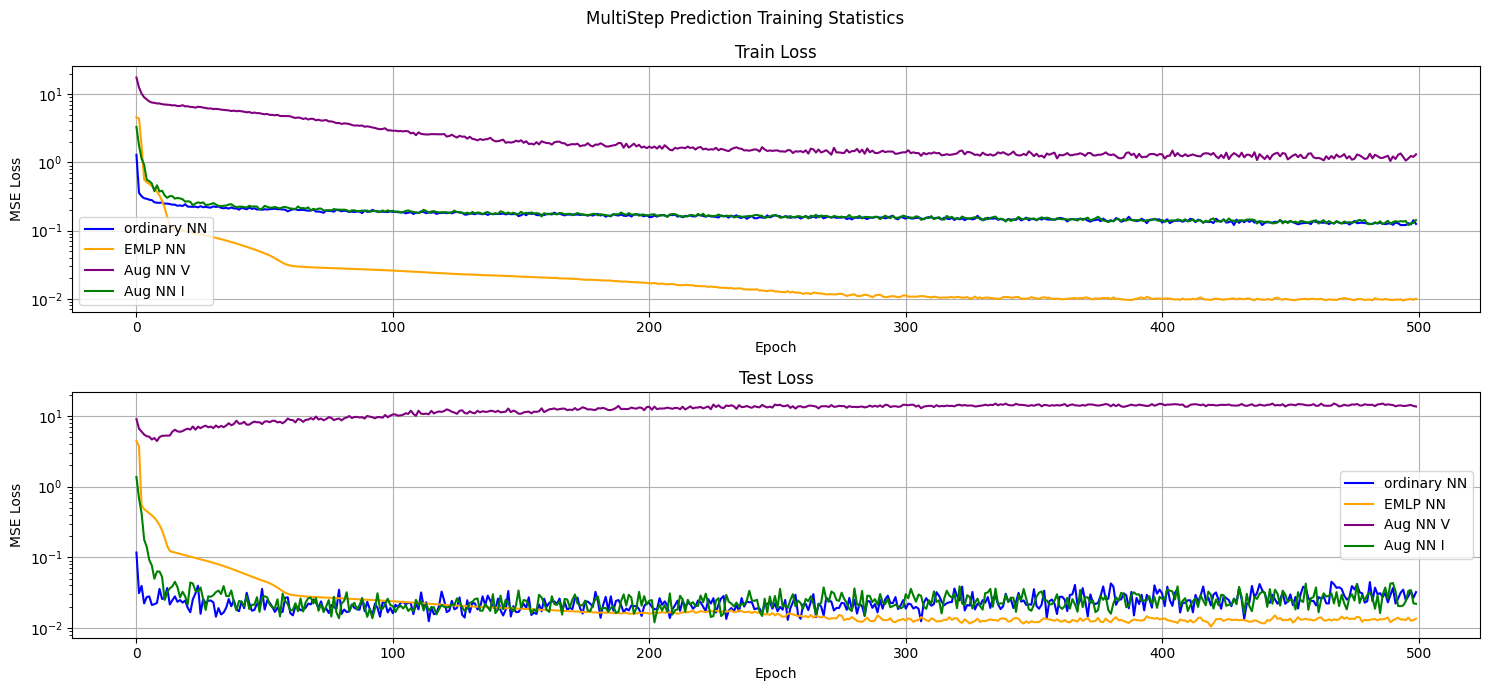

In [8]:
# Plot training statistics
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(stats['train_loss'],label='ordinary NN',color='blue')
plt.plot(stats_emlp['train_loss'],label='EMLP NN',color='orange')
plt.plot(stats_aug_van['train_loss'],label='Aug NN V',color='purple')
plt.plot(stats_aug['train_loss'],label='Aug NN I',color='green')
plt.yscale('log')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(stats['test_loss'],label='ordinary NN',color='blue')
plt.plot(stats_emlp['test_loss'],label='EMLP NN',color='orange')
plt.plot(stats_aug_van['test_loss'],label='Aug NN V',color='purple')
plt.plot(stats_aug['test_loss'],label='Aug NN I',color='green')
plt.yscale('log')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.suptitle('MultiStep Prediction Training Statistics')
plt.tight_layout()
plt.show()

In [9]:
print('Loading Pendulum dataset...') 
with open('Data/pendulum_dataset.pkl','rb') as file:
    data_dict = pickle.load(file)

Loading Pendulum dataset...


In [10]:
test_coords = data_dict['test_states']

In [11]:
last_sequence = test_coords[11,:input_timesteps,:]
n_steps = len(test_coords[0,:,:])-len(last_sequence)

forecast = forecast_nn(model,last_sequence,n_steps,n_dim)
forecast_aug_v = forecast_nn(model_aug_van,last_sequence,n_steps,n_dim)
forecast_aug_i = forecast_nn(model_aug,last_sequence,n_steps,n_dim)
forecast_e = forecast_emlp(model_emlp,last_sequence,n_steps,n_dim)

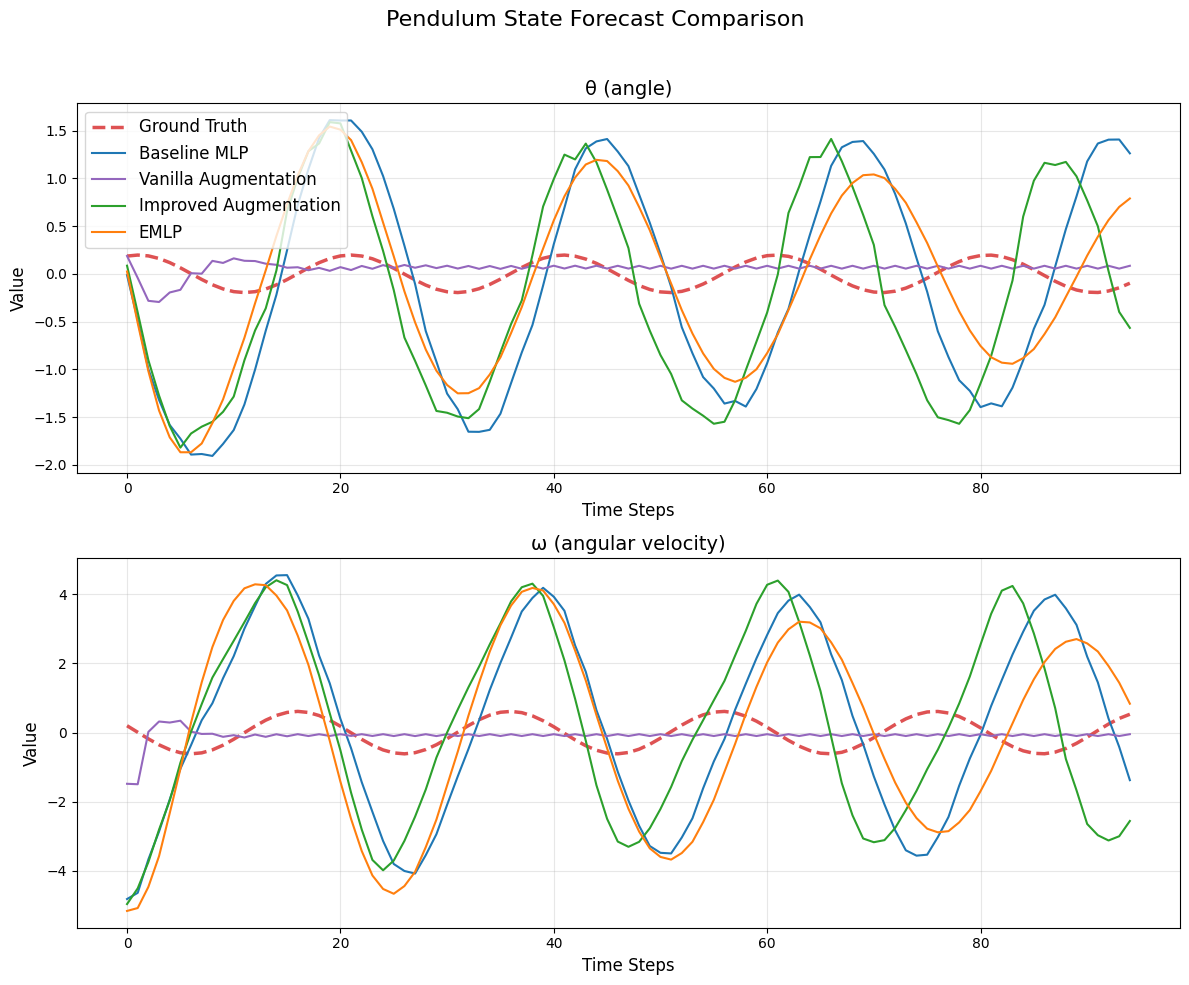

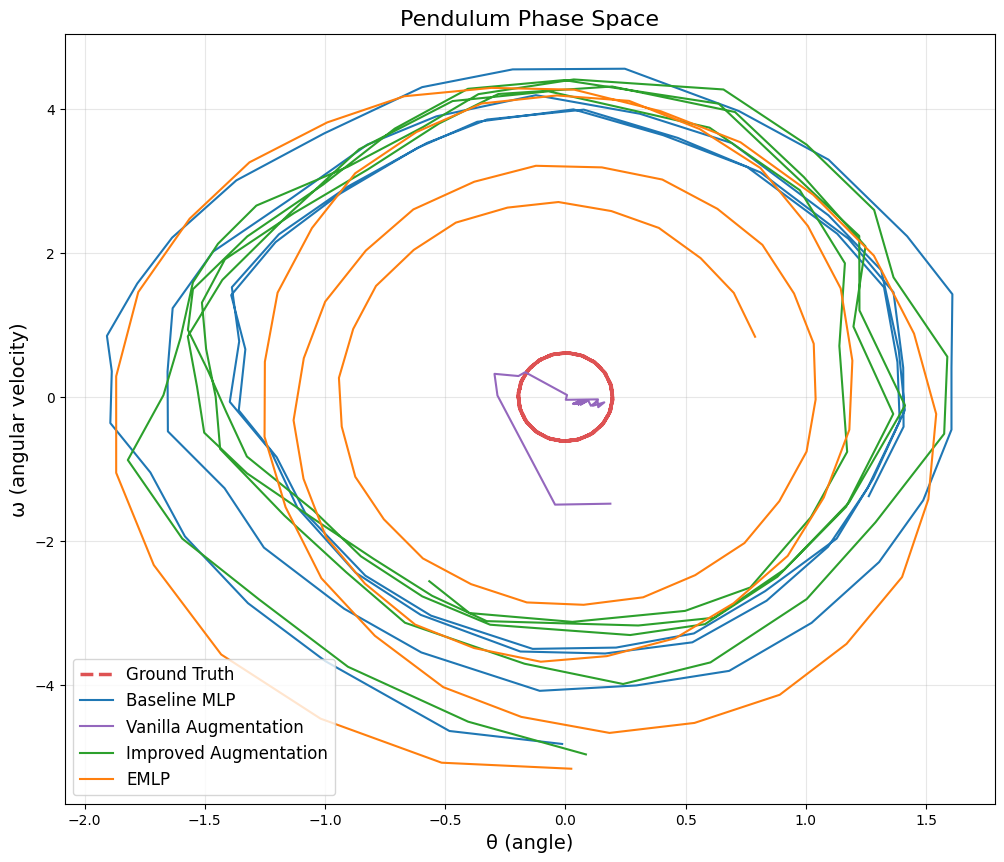

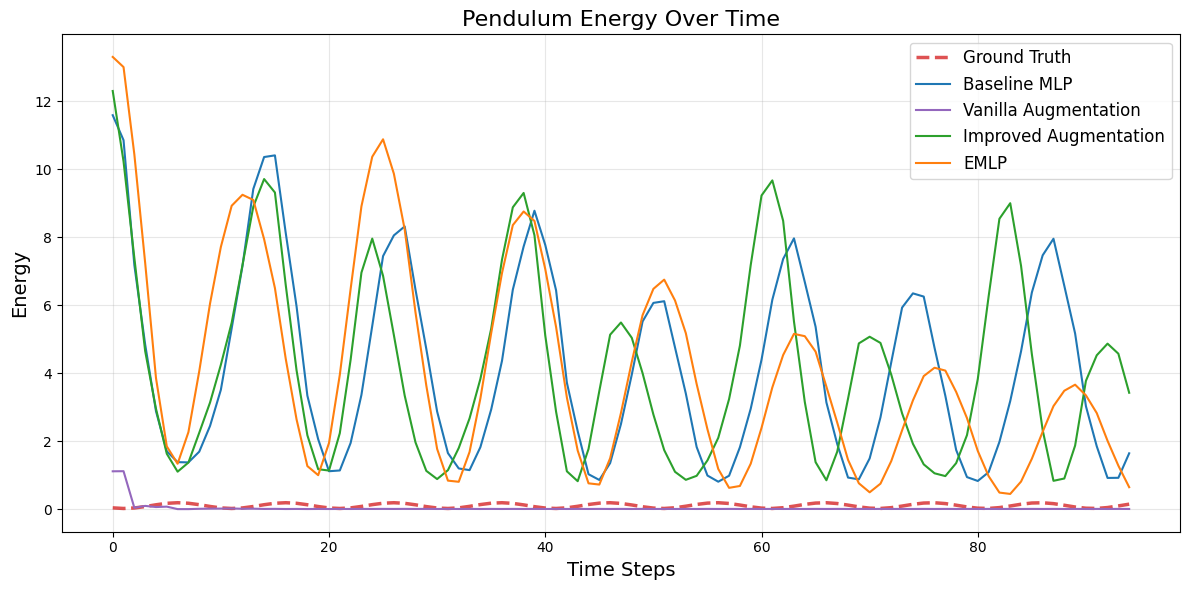

In [12]:
def plot_pendulum_forecasts(forecast, forecast_aug_v, forecast_aug_i, forecast_e, test_coords, input_timesteps):
    """
    Plot pendulum angle and angular velocity forecasts from different models.
    
    Parameters:
    -----------
    forecast : array - Baseline model predictions
    forecast_aug_v : array - Vanilla augmentation model predictions
    forecast_aug_i : array - Improved augmentation model predictions
    forecast_e : array - EMLP model predictions
    test_coords : array - Ground truth coordinates
    input_timesteps : int - Number of initial timesteps used for prediction
    """

    # Extract ground truth data for comparison
    n_steps = len(forecast)
    ground_truth = test_coords[0, input_timesteps:input_timesteps+n_steps]
    
    # Create time steps for x-axis
    time_steps = np.arange(n_steps)
    # Define a consistent color scheme
    colors = {
        'ground_truth': '#d62728',  # Red
        'baseline': '#1f77b4',      # Blue
        'aug_vanilla': '#9467bd',   # Purple
        'aug_improved': '#2ca02c',  # Green
        'emlp': '#ff7f0e'           # Orange
    }
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle('Pendulum State Forecast Comparison', fontsize=16)
    
    # Variable names
    var_names = ['θ (angle)', 'ω (angular velocity)']
    
    # Plot both variables
    for i, ax in enumerate(axes.flat):
        # Plot predictions from all models
        ax.plot(time_steps, ground_truth[:, i], '--', color=colors['ground_truth'], 
                label='Ground Truth', linewidth=2.5, alpha=0.8)
        ax.plot(time_steps, forecast[:, i], '-', color=colors['baseline'], 
                label='Baseline MLP', linewidth=1.5)
        ax.plot(time_steps, forecast_aug_v[:, i], '-', color=colors['aug_vanilla'], 
                label='Vanilla Augmentation', linewidth=1.5)
        ax.plot(time_steps, forecast_aug_i[:, i], '-', color=colors['aug_improved'], 
                label='Improved Augmentation', linewidth=1.5)
        ax.plot(time_steps, forecast_e[:, i], '-', color=colors['emlp'], 
                label='EMLP', linewidth=1.5)
        
        ax.set_title(f'{var_names[i]}', fontsize=14)
        ax.set_xlabel('Time Steps', fontsize=12)
        ax.set_ylabel('Value', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Only add legend to the first plot to save space
        if i == 0:
            ax.legend(fontsize=12, loc='best')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    
    # Create phase space plot (theta vs. omega)
    plt.figure(figsize=(12, 10))
    plt.title('Pendulum Phase Space', fontsize=16)
    
    plt.plot(ground_truth[:, 0], ground_truth[:, 1], '--', color=colors['ground_truth'], 
             label='Ground Truth', linewidth=2.5, alpha=0.8)
    plt.plot(forecast[:, 0], forecast[:, 1], '-', color=colors['baseline'], 
             label='Baseline MLP', linewidth=1.5)
    plt.plot(forecast_aug_v[:, 0], forecast_aug_v[:, 1], '-', color=colors['aug_vanilla'], 
             label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(forecast_aug_i[:, 0], forecast_aug_i[:, 1], '-', color=colors['aug_improved'], 
             label='Improved Augmentation', linewidth=1.5)
    plt.plot(forecast_e[:, 0], forecast_e[:, 1], '-', color=colors['emlp'], 
             label='EMLP', linewidth=1.5)
    
    plt.xlabel('θ (angle)', fontsize=14)
    plt.ylabel('ω (angular velocity)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='best')
    
    # Calculate and plot the energy
    plt.figure(figsize=(12, 6))
    plt.title('Pendulum Energy Over Time', fontsize=16)
    
    # For a simple pendulum, E = 0.5*ω² + (1-cosθ)
    # Assuming mass=1, length=1, g=1 for simplicity
    def pendulum_energy(theta, omega):
        return 0.5 * omega**2 + (1 - np.cos(theta))
    
    plt.plot(time_steps, pendulum_energy(ground_truth[:, 0], ground_truth[:, 1]), '--', 
             color=colors['ground_truth'], label='Ground Truth', linewidth=2.5, alpha=0.8)
    plt.plot(time_steps, pendulum_energy(forecast[:, 0], forecast[:, 1]), '-', 
             color=colors['baseline'], label='Baseline MLP', linewidth=1.5)
    plt.plot(time_steps, pendulum_energy(forecast_aug_v[:, 0], forecast_aug_v[:, 1]), '-', 
             color=colors['aug_vanilla'], label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(time_steps, pendulum_energy(forecast_aug_i[:, 0], forecast_aug_i[:, 1]), '-', 
             color=colors['aug_improved'], label='Improved Augmentation', linewidth=1.5)
    plt.plot(time_steps, pendulum_energy(forecast_e[:, 0], forecast_e[:, 1]), '-', 
             color=colors['emlp'], label='EMLP', linewidth=1.5)
    
    plt.xlabel('Time Steps', fontsize=14)
    plt.ylabel('Energy', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='best')
    
    plt.tight_layout()
    plt.show()

# Call the function with your pendulum data
plot_pendulum_forecasts(
    forecast, 
    forecast_aug_v, 
    forecast_aug_i, 
    forecast_e, 
    test_coords, 
    input_timesteps, 
)

In [13]:
## Computing Error metrics 

n = 10  # Number of samples
indices = np.random.choice(test_coords.shape[0], min(n,test_coords.shape[0]), replace=False)

def mse_comp(arr1,arr2):
    assert arr1.shape == arr2.shape 

    squared_diff = (arr1-arr2)**2 
    return np.mean(squared_diff)

mse = {
    'MO NN':[],
    'MO NN EMLP':[],
    'MO NN Aug V':[], 
    'MO NN Aug I': [],
}

for i,idx in enumerate(indices):
    print(f'Trial {i+1}')
    sim = test_coords[idx,input_timesteps:,:]

    last_sequence = test_coords[idx,:input_timesteps,:]
    n_steps = len(test_coords[idx,:,:])-len(last_sequence)

    nn_forecast = forecast_nn(model,last_sequence,n_steps,n_dim)
    aug_V_forecast = forecast_nn(model_aug_van,last_sequence,n_steps,n_dim)
    aug_I_forecast = forecast_nn(model_aug,last_sequence,n_steps,n_dim)
    emlp_forecast = forecast_emlp(model_emlp,last_sequence,n_steps,n_dim)



    mse['MO NN'].append(mse_comp(sim,nn_forecast))
    mse['MO NN EMLP'].append(mse_comp(sim,emlp_forecast))
    mse['MO NN Aug V'].append(mse_comp(sim,aug_V_forecast))
    mse['MO NN Aug I'].append(mse_comp(sim,aug_I_forecast))



Trial 1


Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10


In [14]:
for k in mse.keys():
    print(f'{k} : {np.mean(mse[k])}')

MO NN : 6.030770187241992
MO NN EMLP : 5.160515522480932
MO NN Aug V : 4.8641313586823065
MO NN Aug I : 7.7674436774241595


In [15]:
print('MO NN :',stats['test_loss'][-1])
print('MO NN EMLP :',stats_emlp['test_loss'][-1])
print('MO NN Aug:',stats_aug['test_loss'][-1])

MO NN : 0.03217137525124209
MO NN EMLP : 0.013547662
MO NN Aug: 0.021997406014374325
